In [4]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [5]:
# Load Dataset
file = 'HeartDataOL.csv'
df = spark.read.csv(file, header=True, inferSchema=True)

In [6]:
# Displaying the first few rows
df.show()

+---+---+------+------+------+-----+-----+-----------+-------+-----+-------+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|glucose|smoke|alcohol|active|cardio|
+---+---+------+------+------+-----+-----+-----------+-------+-----+-------+------+------+
|  0| 50|     0|   168|  62.0|  110|   80|          1|      1|    0|   null|     1|     0|
|  1| 55|     1|   156|  85.0|  140|   90|          3|      1|    0|      0|     1|     1|
|  2| 52|     1|   165|  64.0|  130|   70|          3|      1|    0|      0|     0|     1|
|  3| 48|     0|   169|  82.0|  150|  100|          1|      1|    0|      0|     1|     1|
|  4| 48|     1|   156|  56.0|  100|   60|          1|      1|    0|      0|     0|     0|
|  5| 60|     1|   151|  67.0|  120|   80|          2|      2|    0|      0|     0|     0|
|  6| 61|     1|   157|  93.0|  130|   80|          3|      1|    0|   null|     1|     0|
|  7| 62|     0|   178|  95.0|  130|   90|          3|      3|    0|      0|     1|     1|

In [7]:
# Getting DataFrame shape (rows and columns count)
print((df.count(), len(df.columns)))

(70000, 13)


In [8]:
# Displaying DataFrame info
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- glucose: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alcohol: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [9]:
from pyspark.sql.functions import round, col

# Rounding values to 2 decimal places (for select columns)
rounded_desc = df.select(df.columns).describe()
for col_name in rounded_desc.columns[1:]:  # skip the summary column
    rounded_desc = rounded_desc.withColumn(col_name, round(col(col_name), 2))
rounded_desc.show()


+-------+-------+-------+-------+-------+-------+-------+-------+-----------+-------+-------+-------+-------+-------+
|summary|     id|    age| gender| height| weight|  ap_hi|  ap_lo|cholesterol|glucose|  smoke|alcohol| active| cardio|
+-------+-------+-------+-------+-------+-------+-------+-------+-----------+-------+-------+-------+-------+-------+
|  count|70000.0|69999.0|70000.0|70000.0|69999.0|69996.0|69996.0|    69996.0|69996.0|69993.0|69992.0|69997.0|69997.0|
|   mean|34999.5|  53.34|   0.65| 164.35|  74.21| 128.84|  96.66|       1.37|   1.23|   0.09|   0.05|    0.8|    0.5|
| stddev|20207.4|   6.88|   0.48|   8.35|  14.49| 154.06| 188.56|       0.68|   0.57|   0.28|   0.23|    0.4|    0.5|
|    min|    0.0|  -60.0|    0.0|   10.0|    7.0| -150.0|  -70.0|        1.0|    1.0|    0.0|    0.0|    0.0|    0.0|
|    max|69999.0|  158.0|    1.0|  282.0|  380.0|16020.0|11000.0|        3.0|    3.0|    1.0|    1.0|    1.0|    1.0|
+-------+-------+-------+-------+-------+-------+-------

In [10]:
from pyspark.sql.functions import desc

# Value counts for categorical columns
df.groupBy("gender").count().orderBy(desc("count")).show()
df.groupBy("cholesterol").count().orderBy(desc("count")).show()
df.groupBy("glucose").count().orderBy(desc("count")).show()
df.groupBy("smoke").count().orderBy(desc("count")).show()
df.groupBy("alcohol").count().orderBy(desc("count")).show()
df.groupBy("active").count().orderBy(desc("count")).show()
df.groupBy("cardio").count().orderBy(desc("count")).show()


+------+-----+
|gender|count|
+------+-----+
|     1|45530|
|     0|24470|
+------+-----+

+-----------+-----+
|cholesterol|count|
+-----------+-----+
|          1|52381|
|          2| 9549|
|          3| 8066|
|       null|    4|
+-----------+-----+

+-------+-----+
|glucose|count|
+-------+-----+
|      1|59475|
|      3| 5331|
|      2| 5190|
|   null|    4|
+-------+-----+

+-----+-----+
|smoke|count|
+-----+-----+
|    0|63824|
|    1| 6169|
| null|    7|
+-----+-----+

+-------+-----+
|alcohol|count|
+-------+-----+
|      0|66228|
|      1| 3764|
|   null|    8|
+-------+-----+

+------+-----+
|active|count|
+------+-----+
|     1|56261|
|     0|13736|
|  null|    3|
+------+-----+

+------+-----+
|cardio|count|
+------+-----+
|     0|35020|
|     1|34977|
|  null|    3|
+------+-----+



In [11]:
# Correlation
print("Correlation between cardio and smoke:", df.stat.corr("cardio", "smoke"))

Correlation between cardio and smoke: -0.01546817169232994


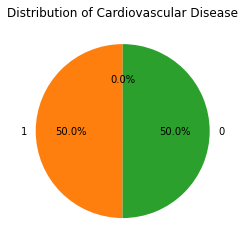

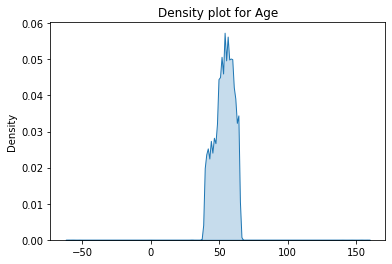

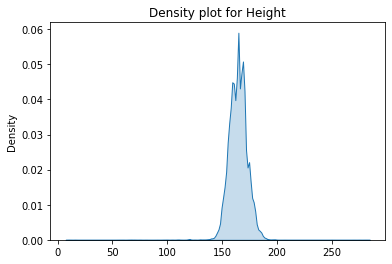

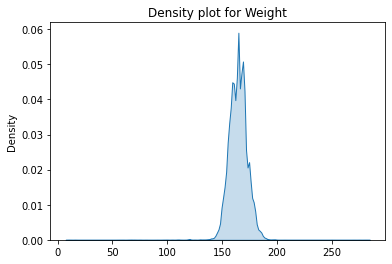

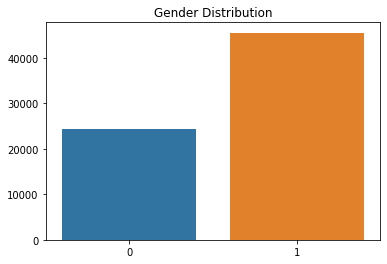

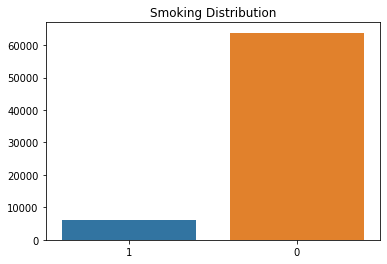

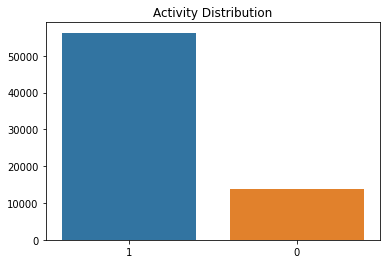

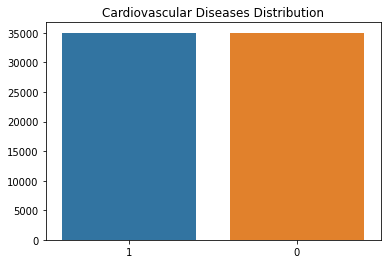

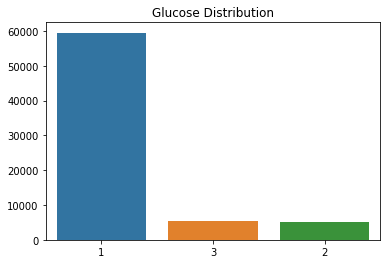

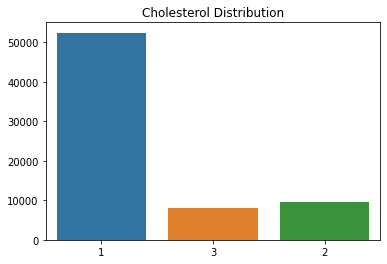

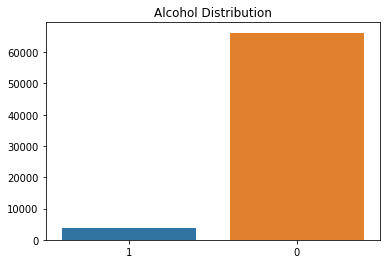

In [19]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

spark = SparkSession.builder.appName('basics').getOrCreate()
file_path = 'HeartDataOL.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Cardiovascular Pie Chart
cardio_counts = df.groupBy("cardio").count().collect()
labels = [row["cardio"] for row in cardio_counts]
sizes = [row["count"] for row in cardio_counts]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cardiovascular Disease')
plt.show()

# Age Density Plot
age_data = df.select("age").rdd.flatMap(lambda x: x).collect()
sns.kdeplot(age_data, shade=True)
plt.title('Density plot for Age')
plt.show()

# Height Density Plot
height_data = df.select("height").rdd.flatMap(lambda x: x).collect()
sns.kdeplot(height_data, shade=True)
plt.title('Density plot for Height')
plt.show()

# Weight Density Plot
height_data = df.select("height").rdd.flatMap(lambda x: x).collect()
sns.kdeplot(height_data, shade=True)
plt.title('Density plot for Weight')
plt.show()

# ... and so on for other columns

# Gender Distribution
gender_counts = df.groupBy("gender").count().collect()
labels = [row["gender"] for row in gender_counts]
counts = [row["count"] for row in gender_counts]
sns.barplot(x=labels, y=counts)
plt.title('Gender Distribution')
plt.show()

# ... and so on for other categorical columns

# Smoke Distribution
smoke_counts = df.groupBy("smoke").count().collect()
labels = [row["smoke"] for row in smoke_counts]
counts = [row["count"] for row in smoke_counts]
sns.barplot(x=labels, y=counts)
plt.title('Smoking Distribution')
plt.show()

# Active Distribution
active_counts = df.groupBy("active").count().collect()
labels = [row["active"] for row in active_counts]
counts = [row["count"] for row in active_counts]
sns.barplot(x=labels, y=counts)
plt.title('Activity Distribution')
plt.show()

# Cardiovascular Diseases Distribution
cardio_counts = df.groupBy("cardio").count().collect()
labels = [row["cardio"] for row in cardio_counts]
counts = [row["count"] for row in cardio_counts]
sns.barplot(x=labels, y=counts)
plt.title('Cardiovascular Diseases Distribution')
plt.show()

# Glucose Distribution
glucose_counts = df.groupBy("glucose").count().collect()
labels = [row["glucose"] for row in glucose_counts]
counts = [row["count"] for row in glucose_counts]
sns.barplot(x=labels, y=counts)
plt.title('Glucose Distribution')
plt.show()

# Cholesterol Distribution
cholesterol_counts = df.groupBy("cholesterol").count().collect()
labels = [row["cholesterol"] for row in cholesterol_counts]
counts = [row["count"] for row in cholesterol_counts]
sns.barplot(x=labels, y=counts)
plt.title('Cholesterol Distribution')
plt.show()

# Alcohol Distribution
alcohol_counts = df.groupBy("alcohol").count().collect()
labels = [row["alcohol"] for row in alcohol_counts]
counts = [row["count"] for row in alcohol_counts]
sns.barplot(x=labels, y=counts)
plt.title('Alcohol Distribution')
plt.show()




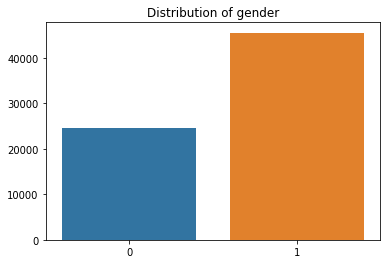

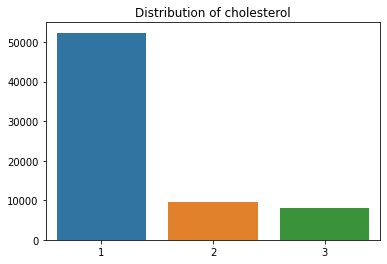

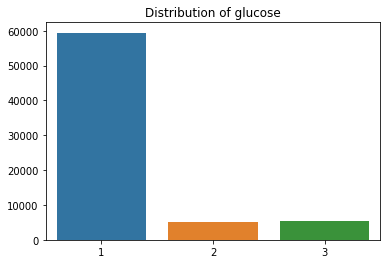

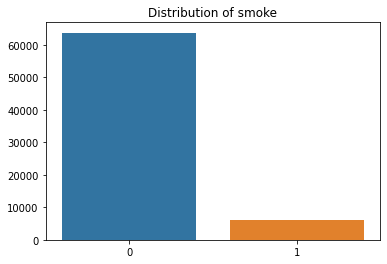

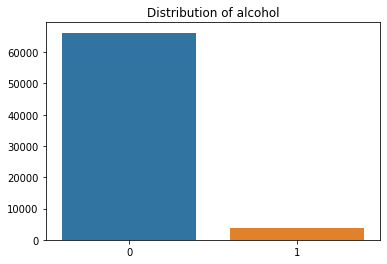

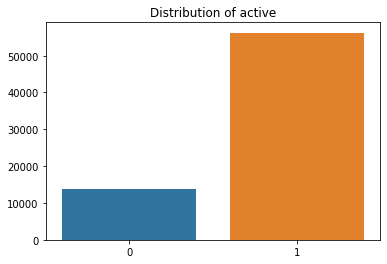

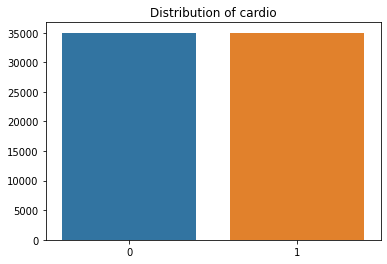

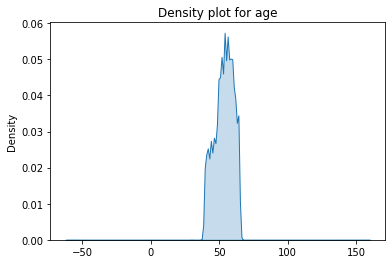

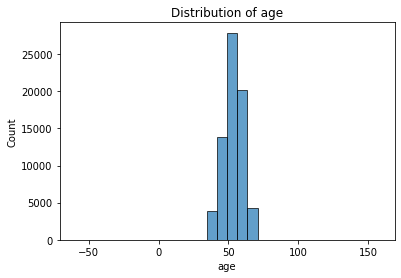

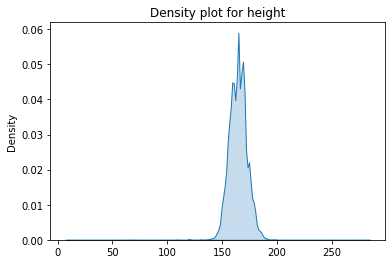

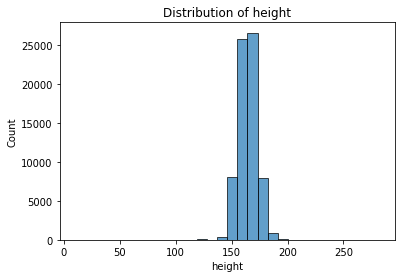

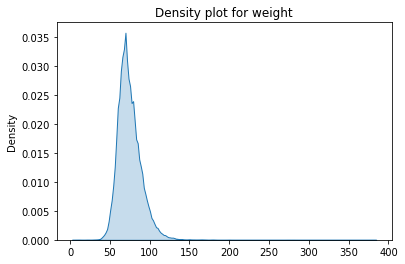

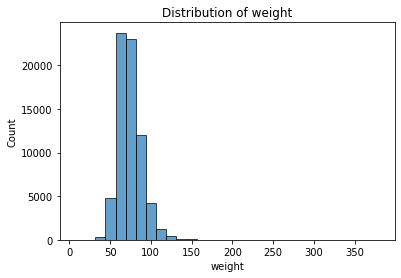

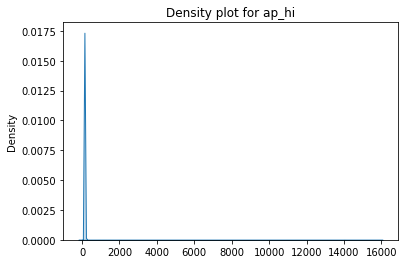

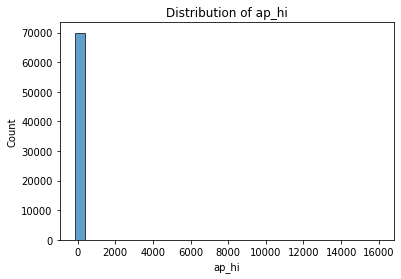

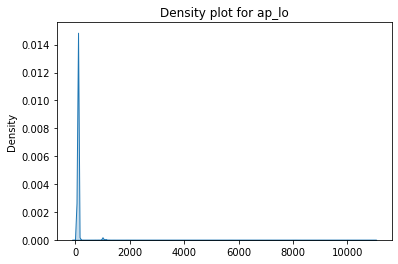

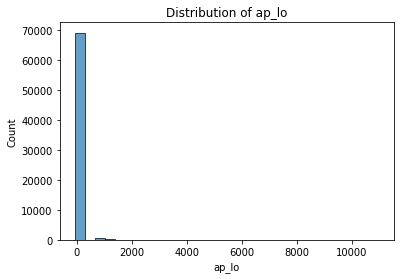

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df
# Filter out rows with None values for each column
for column in df2.columns:
    df2 = df2.filter(col(column).isNotNull())

# Function to plot categorical columns
def plot_categorical(column_name):
    column_counts = df2.groupBy(column_name).count().orderBy(column_name).collect()
    labels = [row[column_name] for row in column_counts]
    counts = [row["count"] for row in column_counts]
    sns.barplot(x=labels, y=counts)
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Function to plot continuous columns with density plot and histogram
def plot_continuous(column_name):
    column_data = df2.select(column_name).rdd.flatMap(lambda x: x).collect()
    
    # Density plot
    sns.kdeplot(column_data, shade=True)
    plt.title(f'Density plot for {column_name}')
    plt.show()
    
    # Histogram
    plt.hist(column_data, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

# List of categorical columns
categorical_columns = ['gender', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio']

# List of continuous columns
continuous_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plotting
for column in categorical_columns:
    plot_categorical(column)

for column in continuous_columns:
    plot_continuous(column)


In [15]:
from pyspark.sql.functions import round, col

# Rounding values to 2 decimal places (for select columns)
rounded_desc = df2.select(df.columns).describe()
for col_name in rounded_desc.columns[1:]:  # skip the summary column
    rounded_desc = rounded_desc.withColumn(col_name, round(col(col_name), 2))
rounded_desc.show()

+-------+--------+-------+-------+-------+-------+-------+-------+-----------+-------+-------+-------+-------+-------+
|summary|      id|    age| gender| height| weight|  ap_hi|  ap_lo|cholesterol|glucose|  smoke|alcohol| active| cardio|
+-------+--------+-------+-------+-------+-------+-------+-------+-----------+-------+-------+-------+-------+-------+
|  count| 69961.0|69961.0|69961.0|69961.0|69961.0|69961.0|69961.0|    69961.0|69961.0|69961.0|69961.0|69961.0|69961.0|
|   mean|35018.93|  53.34|   0.65| 164.35|  74.21| 128.84|  96.67|       1.37|   1.23|   0.09|   0.05|    0.8|    0.5|
| stddev|20196.26|   6.88|   0.48|   8.35|  14.49|  154.1| 188.61|       0.68|   0.57|   0.28|   0.23|    0.4|    0.5|
|    min|     1.0|  -60.0|    0.0|   10.0|    7.0| -150.0|  -70.0|        1.0|    1.0|    0.0|    0.0|    0.0|    0.0|
|    max| 69999.0|  158.0|    1.0|  282.0|  380.0|16020.0|11000.0|        3.0|    3.0|    1.0|    1.0|    1.0|    1.0|
+-------+--------+-------+-------+-------+------

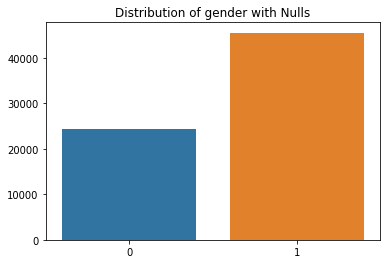

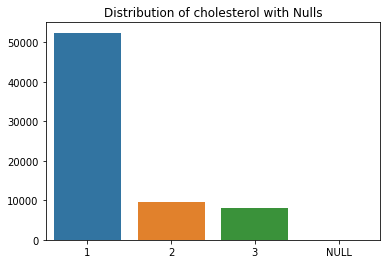

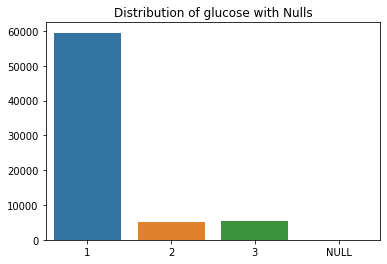

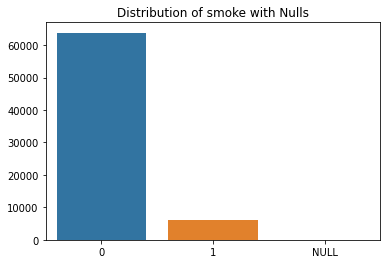

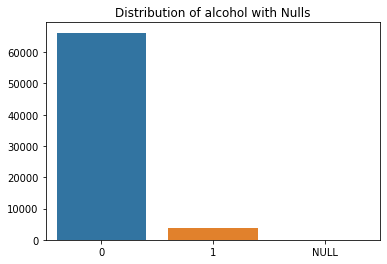

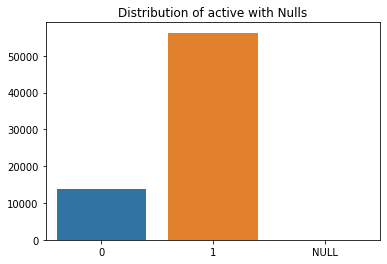

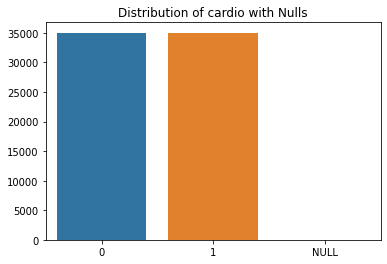

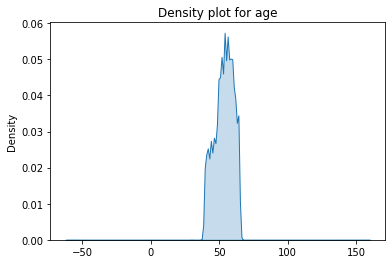

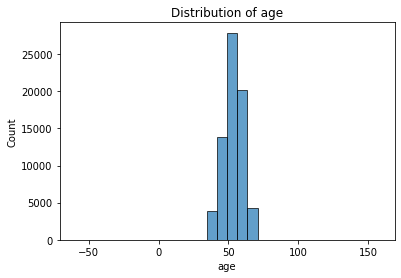

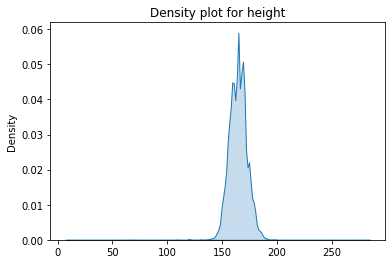

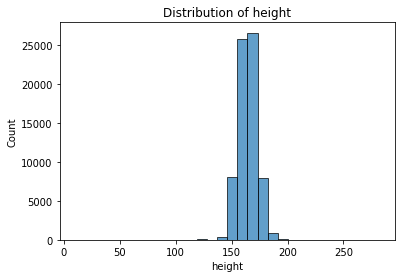

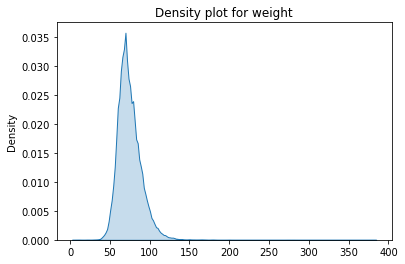

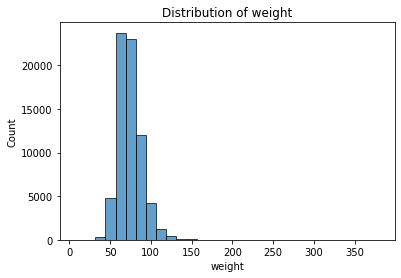

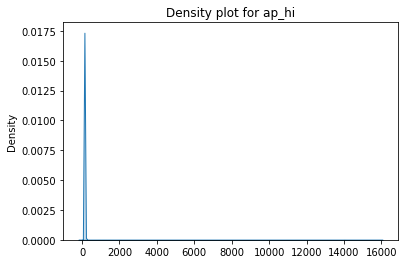

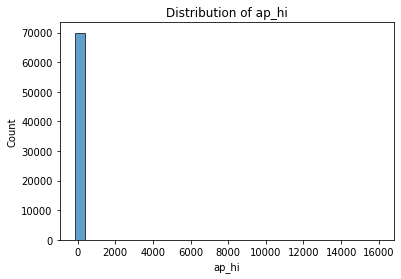

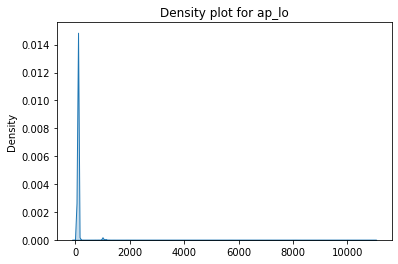

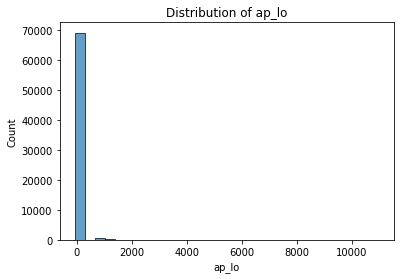

In [21]:
from pyspark.sql.functions import isnan, when, count, col

# Create a copy of df for df3
df3 = df

# Using the functions defined previously to plot

# List of categorical columns
categorical_columns = ['gender', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio']

# List of continuous columns
continuous_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Function to plot categorical columns with null values considered
def plot_categorical_with_null(column_name):
    # Handling nulls by converting them to string "NULL"
    column_counts = df3.withColumn(column_name, when(col(column_name).isNull(), "NULL").otherwise(col(column_name))) \
                       .groupBy(column_name).count().orderBy(column_name).collect()
    labels = [row[column_name] for row in column_counts]
    counts = [row["count"] for row in column_counts]
    sns.barplot(x=labels, y=counts)
    plt.title(f'Distribution of {column_name} with Nulls')
    plt.show()

# Plotting
for column in categorical_columns:
    plot_categorical_with_null(column)

for column in continuous_columns:
    plot_continuous(column)


In [22]:
from pyspark.sql.functions import round, col

# Rounding values to 2 decimal places (for select columns)
rounded_desc = df3.select(df.columns).describe()
for col_name in rounded_desc.columns[1:]:  # skip the summary column
    rounded_desc = rounded_desc.withColumn(col_name, round(col(col_name), 2))
rounded_desc.show()

+-------+-------+-------+-------+-------+-------+-------+-------+-----------+-------+-------+-------+-------+-------+
|summary|     id|    age| gender| height| weight|  ap_hi|  ap_lo|cholesterol|glucose|  smoke|alcohol| active| cardio|
+-------+-------+-------+-------+-------+-------+-------+-------+-----------+-------+-------+-------+-------+-------+
|  count|70000.0|69999.0|70000.0|70000.0|69999.0|69996.0|69996.0|    69996.0|69996.0|69993.0|69992.0|69997.0|69997.0|
|   mean|34999.5|  53.34|   0.65| 164.35|  74.21| 128.84|  96.66|       1.37|   1.23|   0.09|   0.05|    0.8|    0.5|
| stddev|20207.4|   6.88|   0.48|   8.35|  14.49| 154.06| 188.56|       0.68|   0.57|   0.28|   0.23|    0.4|    0.5|
|    min|    0.0|  -60.0|    0.0|   10.0|    7.0| -150.0|  -70.0|        1.0|    1.0|    0.0|    0.0|    0.0|    0.0|
|    max|69999.0|  158.0|    1.0|  282.0|  380.0|16020.0|11000.0|        3.0|    3.0|    1.0|    1.0|    1.0|    1.0|
+-------+-------+-------+-------+-------+-------+-------

In [18]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Assuming df2 with null values dropped

# Remove 'id' from the list of columns
columns_without_id = [col for col in df2.columns if col != 'id']

# Transform all columns (excluding 'id') into a feature vector
assembler = VectorAssembler(inputCols=columns_without_id, outputCol="features")
df2_vector = assembler.transform(df2).select("features")

# Compute the correlation matrix
matrix = Correlation.corr(df2_vector, "features").head()[0].toArray()

# Display the correlation matrix
num_rows, num_cols = matrix.shape

# Define a fixed width for the columns
width = 8

# Print column headers
print("".join([col.ljust(width) for col in [""] + columns_without_id]))

for i in range(num_rows):
    values = ["{:.2f}".format(matrix[i, j]).ljust(width) for j in range(num_cols)]
    print(columns_without_id[i].ljust(width) + "".join(values))

23/10/06 07:08:27 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/06 07:08:27 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


        age     gender  height  weight  ap_hi   ap_lo   cholesterolglucose smoke   alcohol active  cardio  
age     1.00    0.02    -0.08   0.05    0.02    0.02    0.15    0.10    -0.05   -0.03   -0.01   0.23    
gender  0.02    1.00    -0.49   -0.15   -0.01   -0.02   0.04    0.02    -0.34   -0.17   -0.01   -0.01   
height  -0.08   -0.49   1.00    0.28    0.01    0.01    -0.05   -0.02   0.18    0.09    -0.01   -0.01   
weight  0.05    -0.15   0.28    1.00    0.03    0.04    0.14    0.11    0.07    0.07    -0.02   0.18    
ap_hi   0.02    -0.01   0.01    0.03    1.00    0.02    0.02    0.01    -0.00   0.00    0.00    0.05    
ap_lo   0.02    -0.02   0.01    0.04    0.02    1.00    0.02    0.01    0.01    0.01    0.00    0.07    
cholesterol0.15    0.04    -0.05   0.14    0.02    0.02    1.00    0.45    0.01    0.04    0.01    0.22    
glucose 0.10    0.02    -0.02   0.11    0.01    0.01    0.45    1.00    -0.00   0.01    -0.01   0.09    
smoke   -0.05   -0.34   0.18    0.07    -0.00   0

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


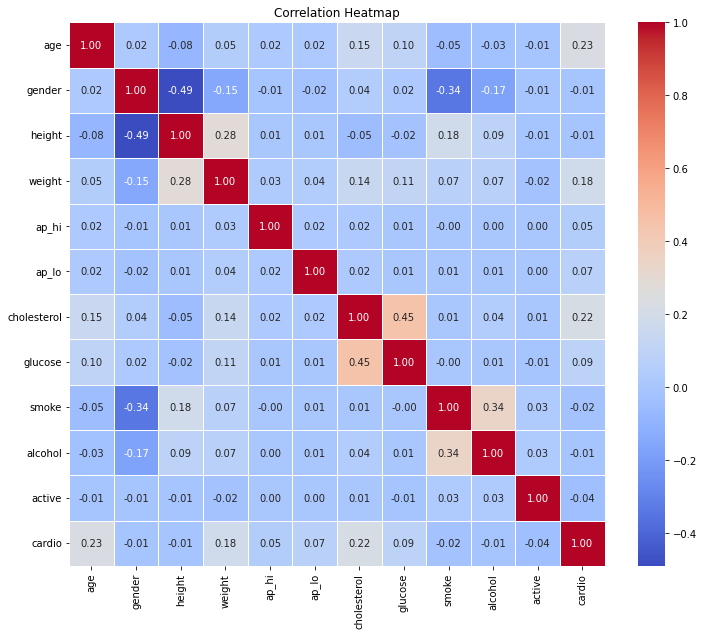

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
correlation_data = [
    [1.00, 0.02, -0.08, 0.05, 0.02, 0.02, 0.15, 0.10, -0.05, -0.03, -0.01, 0.23],
    [0.02, 1.00, -0.49, -0.15, -0.01, -0.02, 0.04, 0.02, -0.34, -0.17, -0.01, -0.01],
    [-0.08, -0.49, 1.00, 0.28, 0.01, 0.01, -0.05, -0.02, 0.18, 0.09, -0.01, -0.01],
    [0.05, -0.15, 0.28, 1.00, 0.03, 0.04, 0.14, 0.11, 0.07, 0.07, -0.02, 0.18],
    [0.02, -0.01, 0.01, 0.03, 1.00, 0.02, 0.02, 0.01, -0.00, 0.00, 0.00, 0.05],
    [0.02, -0.02, 0.01, 0.04, 0.02, 1.00, 0.02, 0.01, 0.01, 0.01, 0.00, 0.07],
    [0.15, 0.04, -0.05, 0.14, 0.02, 0.02, 1.00, 0.45, 0.01, 0.04, 0.01, 0.22],
    [0.10, 0.02, -0.02, 0.11, 0.01, 0.01, 0.45, 1.00, -0.00, 0.01, -0.01, 0.09],
    [-0.05, -0.34, 0.18, 0.07, -0.00, 0.01, 0.01, -0.00, 1.00, 0.34, 0.03, -0.02],
    [-0.03, -0.17, 0.09, 0.07, 0.00, 0.01, 0.04, 0.01, 0.34, 1.00, 0.03, -0.01],
    [-0.01, -0.01, -0.01, -0.02, 0.00, 0.00, 0.01, -0.01, 0.03, 0.03, 1.00, -0.04],
    [0.23, -0.01, -0.01, 0.18, 0.05, 0.07, 0.22, 0.09, -0.02, -0.01, -0.04, 1.00]
]

columns = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "glucose", "smoke", "alcohol", "active", "cardio"]

# Create Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_data, xticklabels=columns, yticklabels=columns, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




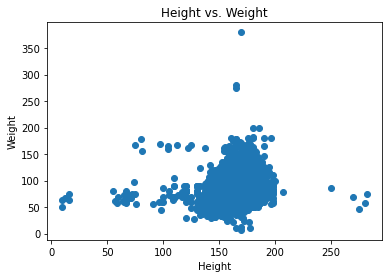

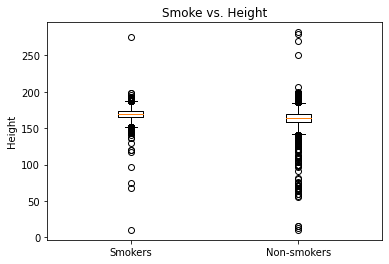

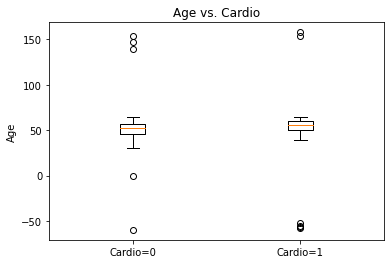

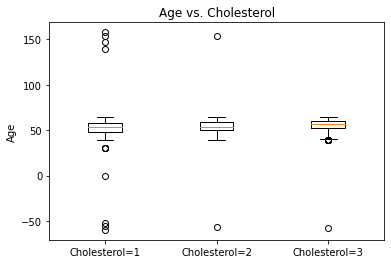

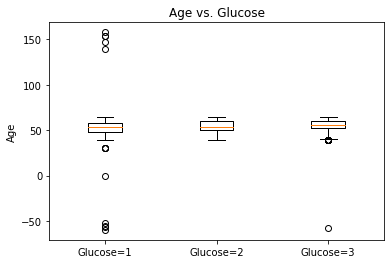

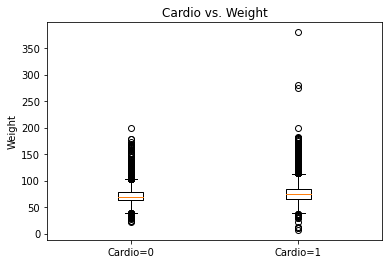

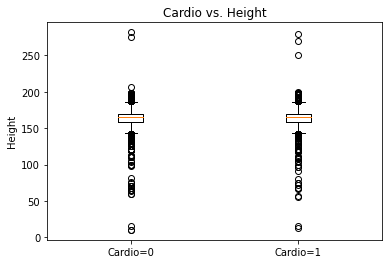

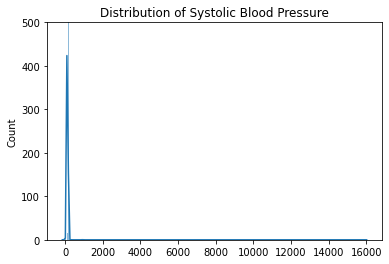

In [57]:
#Height vs. Weight
import matplotlib.pyplot as plt

# Collect the data
height_data = df.select("Height").rdd.flatMap(lambda x: x).collect()
weight_data = df.select("Weight").rdd.flatMap(lambda x: x).collect()

# Plot the data
plt.scatter(height_data, weight_data)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs. Weight")
plt.show()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Boxplot Analysis") \
    .getOrCreate()

smokers = df.filter(df["smoke"] == 1).select("height").rdd.flatMap(lambda x: x).collect()
non_smokers = df.filter(df["smoke"] == 0).select("height").rdd.flatMap(lambda x: x).collect()

plt.boxplot([smokers, non_smokers], labels=['Smokers', 'Non-smokers'])
plt.title("Smoke vs. Height")
plt.ylabel("Height")
plt.show()

#Age vs. Cardio:
cardio_0 = df2.filter(df["cardio"] == 0).select("age").rdd.flatMap(lambda x: x).collect()
cardio_1 = df2.filter(df["cardio"] == 1).select("age").rdd.flatMap(lambda x: x).collect()

plt.boxplot([cardio_0, cardio_1], labels=['Cardio=0', 'Cardio=1'])
plt.title("Age vs. Cardio")
plt.ylabel("Age")
plt.show()

#Age vs. cholesterol:
cholesterol_1 = df2.filter(df["cholesterol"] == 1).select("age").rdd.flatMap(lambda x: x).collect()
cholesterol_2 = df2.filter(df["cholesterol"] == 2).select("age").rdd.flatMap(lambda x: x).collect()
cholesterol_3 = df2.filter(df["cholesterol"] == 3).select("age").rdd.flatMap(lambda x: x).collect()

plt.boxplot([cholesterol_1, cholesterol_2, cholesterol_3], labels=['Cholesterol=1', 'Cholesterol=2', 'Cholesterol=3'])
plt.title("Age vs. Cholesterol")
plt.ylabel("Age")
plt.show()

#Age vs. Glucose:
glucose_1 = df2.filter(df["glucose"] == 1).select("age").rdd.flatMap(lambda x: x).collect()
glucose_2 = df2.filter(df["glucose"] == 2).select("age").rdd.flatMap(lambda x: x).collect()
glucose_3 = df2.filter(df["glucose"] == 3).select("age").rdd.flatMap(lambda x: x).collect()

plt.boxplot([glucose_1, glucose_2, glucose_3], labels=['Glucose=1', 'Glucose=2', 'Glucose=3'])
plt.title("Age vs. Glucose")
plt.ylabel("Age")
plt.show()

#Cardio vs. Weight:
cardio_0_weight = df2.filter(df["cardio"] == 0).select("weight").rdd.flatMap(lambda x: x).collect()
cardio_1_weight = df2.filter(df["cardio"] == 1).select("weight").rdd.flatMap(lambda x: x).collect()

plt.boxplot([cardio_0_weight, cardio_1_weight], labels=['Cardio=0', 'Cardio=1'])
plt.title("Cardio vs. Weight")
plt.ylabel("Weight")
plt.show()

#Cardio vs. Height:
cardio_0_height = df2.filter(df["cardio"] == 0).select("height").rdd.flatMap(lambda x: x).collect()
cardio_1_height = df2.filter(df["cardio"] == 1).select("height").rdd.flatMap(lambda x: x).collect()

plt.boxplot([cardio_0_height, cardio_1_height], labels=['Cardio=0', 'Cardio=1'])
plt.title("Cardio vs. Height")
plt.ylabel("Height")
plt.show()

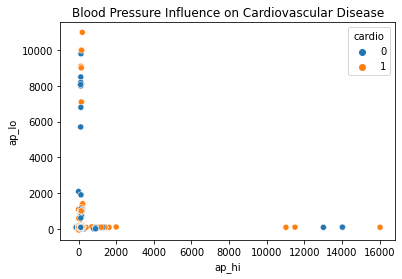

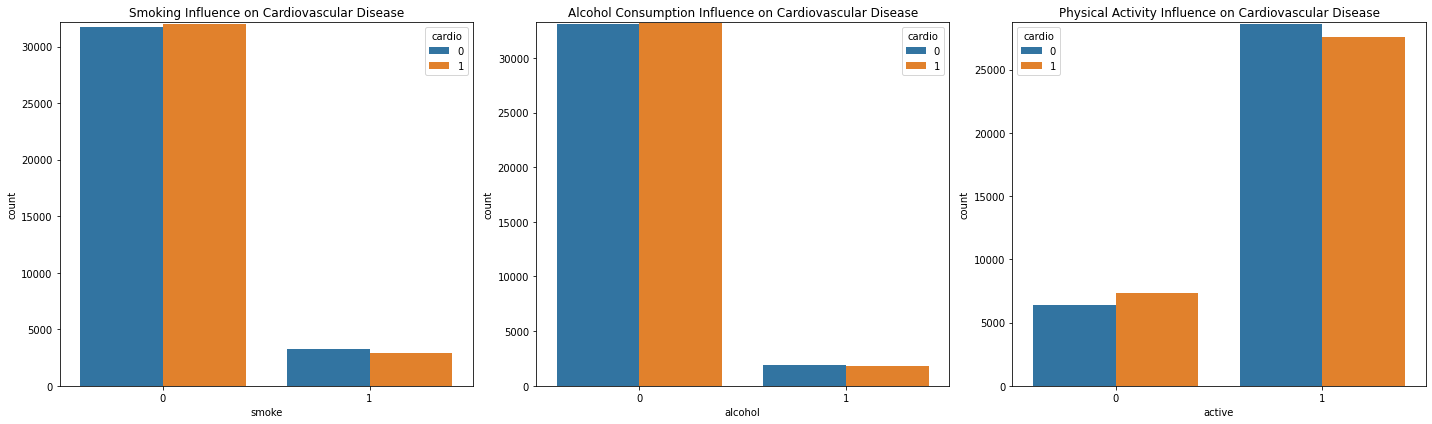

In [24]:
#Blood Pressure vs Cardiovascular Disease:
bp_data = df2.select("ap_hi", "ap_lo", "cardio").toPandas()

sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=bp_data)
plt.title('Blood Pressure Influence on Cardiovascular Disease')
plt.show()

# 2.3.5 Lifestyle Factors vs. Cardiovascular Risk
f, axes = plt.subplots(1, 3, figsize=(20, 6))

# Smoking Influence on Cardiovascular Disease
smoke_data = df2.groupBy("smoke", "cardio").count().toPandas()
sns.barplot(x='smoke', y='count', hue='cardio', data=smoke_data, ax=axes[0])
axes[0].set_title('Smoking Influence on Cardiovascular Disease')
axes[0].set_ylim(0, smoke_data['count'].max() + 100)  # Adjust the upper limit

# Alcohol Consumption Influence on Cardiovascular Disease
alcohol_data = df2.groupBy("alcohol", "cardio").count().toPandas()
sns.barplot(x='alcohol', y='count', hue='cardio', data=alcohol_data, ax=axes[1])
axes[1].set_title('Alcohol Consumption Influence on Cardiovascular Disease')
axes[1].set_ylim(0, alcohol_data['count'].max() + 100)  # Adjust the upper limit

# Physical Activity Influence on Cardiovascular Disease
active_data = df2.groupBy("active", "cardio").count().toPandas()
sns.barplot(x='active', y='count', hue='cardio', data=active_data, ax=axes[2])
axes[2].set_title('Physical Activity Influence on Cardiovascular Disease')
axes[2].set_ylim(0, active_data['count'].max() + 100)  # Adjust the upper limit

plt.tight_layout()
plt.show()
